# Passive Electrical properties of membranes
- passive electrical properties = properties that are fixed around resting membrane potential
- Equivalent circuit has a resistor and capacitor in series, with battery in parallel
- Resistor because current can flow
- Capacitor because it can separate charges across an insulator

#Ohms law, resistance
V = I*R
i_k = gamma_k*(V_m - E_k) # ohms law for single channel 
g_Na = N0 * gamma_Na

#Capacitance
q = C_m * V_m # charge(coulombs) = Capacitance (Fahrad) * Potential difference (Volt)



Membrane Change over time

$\large \Delta V_m (t) = \Delta V_{resting} (1- e^{\frac{-t}{T_m}})$

I guess you could write this as a differential equation no? 

$\large \frac{dV(t)}{dt} = (1- e^{\frac{-t}{T_m}}) V dt$

In [1]:
import sympy as sp

t, Tm = sp.symbols("t, Tm")
V = sp.Function('V')(t)
Vinf = sp.symbols('Vinf')
dVdt = sp.diff(V,t)

eq = sp.Eq(dVdt, (1-sp.exp(-t/Tm))*Vinf)
display(eq)

Eq(Derivative(V(t), t), Vinf*(1 - exp(-t/Tm)))

In [2]:
sol = sp.dsolve(eq)
display(sol)
display(sol.simplify())

t0 = sol.args[1].subs(t,0)
display(t0)
V0 = sp.symbols('V0')

init_eq = sp.Eq(V0,t0)
display(init_eq)
C1 = t0.args[0]
display(C1)

Eq(V(t), C1 + Vinf*(Tm*exp(-t/Tm) + t))

Eq(V(t), C1 + Tm*Vinf*exp(-t/Tm) + Vinf*t)

C1 + Tm*Vinf

Eq(V0, C1 + Tm*Vinf)

C1

In [3]:
C1_sol = sp.solve(init_eq,C1)
display(C1_sol[0])

final_right = sol.args[1].subs(C1,C1_sol[0])
final = sp.Eq(V,final_right)

display(final)
print(final)

-Tm*Vinf + V0

Eq(V(t), -Tm*Vinf + V0 + Vinf*(Tm*exp(-t/Tm) + t))

Eq(V(t), -Tm*Vinf + V0 + Vinf*(Tm*exp(-t/Tm) + t))



Bad key text.latex.unicode in file /usr/local/KUL_apps/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /usr/local/KUL_apps/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /usr/local/KUL_apps/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotli

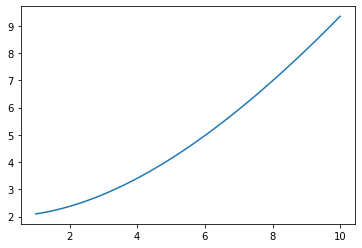

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def membrane_change(t,V0,Vinf,Tm):
    return  -Tm*Vinf + V0 + Vinf*(Tm*np.exp(-t/Tm) + t)

t = np.linspace(1,10,100)
V0 =2
Tm = 10
Vinf = 2

plt.plot(t,membrane_change(t,V0,Vinf,Tm))

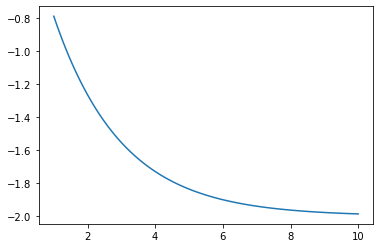

In [5]:
#Something seems wrong, maybe the formula is simpler than thought?
t = np.linspace(1,10,100)

def delta_v(t,Tm,Vinf,V0):
    return Vinf*(1-np.exp(-t/Tm))
Tm = 2
Vinf = -2

plt.plot(t,delta_v(t,Tm,Vinf,V0))

# This seems more like it, but there must be more


## Something isn't quite right, starting over again

In [6]:
#start fresh
t, Tm = sp.symbols("t, Tm")
V = sp.Function('V')(t)
Vinf = sp.symbols('Vinf')
print(t, Tm, V, Vinf)

t Tm V(t) Vinf


In [7]:
#this is what the equaton should look like
eq = sp.Eq(V, (1-sp.exp(-t/Tm))*Vinf)
display(eq)

Eq(V(t), Vinf*(1 - exp(-t/Tm)))

In [8]:
#differentiating the right terms
right = eq.args[1]
right_d = sp.diff(right,t)
display(right_d)

Vinf*exp(-t/Tm)/Tm

In [9]:
#Differentiating the left terms
left = eq.args[0]
left_d = sp.diff(left,t)
display(left_d)

Derivative(V(t), t)

In [10]:
#solving the differential equation
eq = sp.Eq(left_d,right_d)
sol = sp.dsolve(eq)
display(sol)

Eq(V(t), C1 - Vinf*exp(-t/Tm))

In [11]:
# setting up the t=0 condition
t0 = sol.args[1].subs(t,0)
V0 = sp.symbols('V0')
eq_init = sp.Eq(V0,t0)
display(eq_init)

Eq(V0, C1 - Vinf)

In [12]:
#Isolate C1 and solve it symhbolically
C1 = t0.args[0]

C1_sol = sp.solve(eq_init,C1)
C1_sol[0]

V0 + Vinf

In [13]:
#put everything together in the final differential equation
right = sol.args[1].subs(C1,C1_sol[0])

final = sp.Eq(V,right)

display(final)
print("copy paste the content of the final term into a function and add numpy stuff")
print(final.args)

Eq(V(t), V0 + Vinf - Vinf*exp(-t/Tm))

copy paste the content of the final term into a function and add numpy stuff
(V(t), V0 + Vinf - Vinf*exp(-t/Tm))


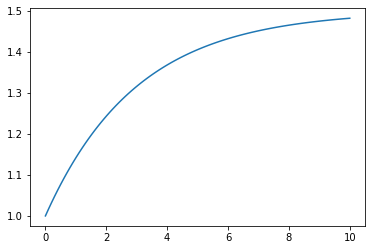

In [18]:
#Alright let's pray that this thing works
def V(t,V0,Vinf,Tm):
    return V0 + Vinf - Vinf*np.exp(-t/Tm)

t = np.linspace(0,10,100)
V0 = 1
Vinf = 0.5
Tm = 3

plt.plot(t,V(t,V0,Vinf,Tm)) #plotting the values

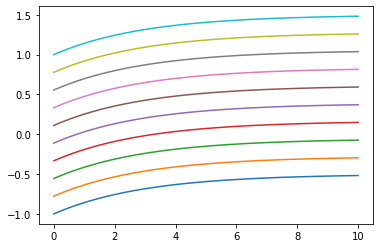

In [19]:
#alright interesting, what changes with different values of V0? Should all converge on Vinf I think.
V0s = np.linspace(-1,1,10)

for V0 in V0s:
    plt.plot(t,V(t,V0,Vinf,Tm))

#ok not entirely sure that this is the right thing, but conceptually, I could take an equation, set up a differential thing
# plot values with it and that's really good.
    